
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import math
import pandas as pd
import seaborn as sb
import numpy
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [6]:
# number of callbacks for balck-sounding names
sum(data[data.race=='b'].call)

157.0

In [28]:
racedistb = data[data.race=='b']
racedistw = data[data.race=='w']

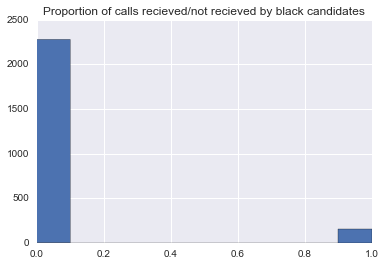

In [22]:
plt.figure()
plt.hist(racedistb)
plt.title('Proportion of calls recieved/not recieved by black candidates')

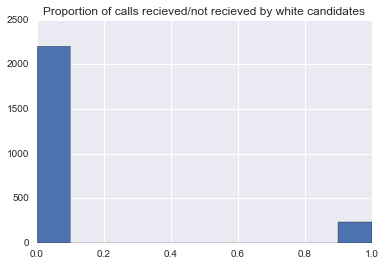

In [21]:
plt.figure()
plt.hist(racedistw)
plt.title('Proportion of calls recieved/not recieved by white candidates')

In [61]:
# Finding sample proportions and variances of 2 samples:

# White candidates sample
print('White candidates sample size:', racedistw.call.count())
print('White candidates that have recieved a call:', racedistw[racedistw.call == 1].call.count() )
print('White candidates that have not recieved a call:', racedistw[racedistw.call == 0].call.count() )
Pw = racedistw[racedistw.call == 1].call.count()/racedistw.call.count()
print('Sample proportion for white candidates:', Pw)
Sigw = (Pw*(1-Pw))/racedistw.call.count()
print('Sample variance for white candidates:', Sigw)

White candidates sample size: 2435
White candidates that have recieved a call: 235
White candidates that have not recieved a call: 2200
Sample proportion for white candidates: 0.0965092402464
Sample variance for white candidates: 3.5809119833e-05


In [62]:
# Black candidates sample
print('Black candidates sample size:', racedistb.call.count())
print('Black candidates that have recieved a call:', racedistb[racedistb.call == 1].call.count() )
print('Black candidates that have not recieved a call:', racedistb[racedistb.call == 0].call.count() )
Pb = racedistb[racedistb.call == 1].call.count()/racedistb.call.count()
print('Sample proportion for black candidates:', Pw)
Sigb = (Pb*(1-Pb))/racedistb.call.count()
print('Sample variance for black candidates:', Sigb)

Black candidates sample size: 2435
Black candidates that have recieved a call: 157
Black candidates that have not recieved a call: 2278
Sample proportion for black candidates: 0.0965092402464
Sample variance for black candidates: 2.47717378565e-05


In [70]:
# Finding out is there is a significant diffrence in responce call between white and black candidates
# Consider 95% confidence interval:

Pdiff = Pw - Pb
z_score = 1.96
Sigdiff = math.sqrt(Sigw + Sigb)
interval = z_score*Sigdiff
print('95% confidence interval for Pw - Pb lies within:',Pdiff - interval, ' and ', Pdiff + interval)

95% confidence interval for Pw - Pb lies within: 0.0167774478596  and  0.0472882605593


In [84]:
# Hypothesis testing:

# H0: there is no difference in responce calls for white and black candidates ==>> Pw-Pb = 0
# H1: there is a difference in response calls for white and black candidates ==>> Pw-Pb != 0
# Consider significance level 5%
Ph0 = (racedistw[racedistw.call == 1].call.count() + racedistb[racedistb.call == 1].call.count())/(racedistb.call.count() + 
                                                                                                   racedistw.call.count())
Sigp0 = math.sqrt((2*Ph0*(1-Ph0))/racedistw.call.count())
z_scoreh0 = (Pdiff - 0)/Sigp0
z_scoreh0
# Reject H0 there is a difference in response calls between white and black candidates

4.1084121524343464